# Plot vowels

Let's use Python to plot our extracted formant vowels and inspect our vowels spaces.
We'll start with a very simple figure, where we simply plot the raw F1 and F2 frequencies for the cardinal vowels.
Things to notice:
1. We need to import libraries
2. We use `pandas` to import and structure our data
3. We use `seaborn` to make plotting easier
4. We use `matplotlib.pyplot` to make adjustments to our figure
5. We rename libraries with abreviations

In [1]:
# import data structuring and plotting libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read our csv file into a dataframe
df = pd.read_csv("/Users/ethan/Documents/GitHub/praat-workshop/data/cardinal_vowels/formants.csv")

# inspect the first 5 lines
df.head()

,Vowel,F1,F2,F3
0,vowels1.wav,350.801919,2392.458027,3176.248282
1,vowels2.wav,414.043567,2326.744712,2789.926437
2,vowels3.wav,695.099485,1947.917695,2767.022788
3,vowels4.wav,899.606390,1487.147618,2256.217774
4,vowels5.wav,712.226222,1114.328494,3041.588454


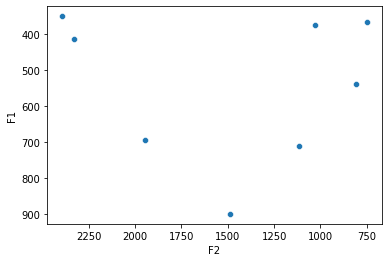

In [3]:
ax = sns.scatterplot(data=df, x=df['F2'], y=df['F1'])
ax.invert_yaxis()
ax.invert_xaxis()

## Fancier vowel plots using helper functions

The vowelplot, barkify, and Lobify functions below were written by [Emily Remirez](https://sites.google.com/berkeley.edu/eremirez/) and copied from: [Linguistics Methods Hub: Vowel plotting in Python](https://lingmethodshub.github.io/content/python/vowel-plotting-py/index.html).

Using Emily's functions, we can quickly and easily make professional-looking vowel plots for comparing speakers, dialects, or languages.


In [1]:
# vowelplot function
# written by Emily Remirez
# small modification to remove left and right spines by Ethan Weed

import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

def vowelplot (vowelcsv, color=None, F1="F1", F2="F2", vowel="Vowel", title="Vowel Plot", unit="Hz", logscale=True):
  
    #Set some parameters for the chart itself
    sns.set(style='ticks', context='notebook')
    plt.figure(figsize=(6,6))
    
    # If there's an argument for color, determine whether it's likely to be categorical
    ## If it's a string (text), use a categorical color palette
    ## If it's a number, use a sequential color palette
    if color != None:
        if type(vowelcsv[color].iloc[0])==str:
            pal = "husl"
        else:
            pal = "viridis"
            
        pl = sns.scatterplot(x = F2,
                             y = F1,
                             hue = color,
                             data = vowelcsv,
                             palette = pal,
                             s = 200)
        
    # If no color argument is given, don't specify hue, and no palette needed
    else:
        pl = sns.scatterplot(x = F2,
                             y = F1,
                             data = vowelcsv)
    
    
    #Invert axes to correlate with articulatory space!
    pl.invert_yaxis()
    pl.invert_xaxis()
    
    #Add unit to the axis labels
    F1name = str("F1 ("+unit+")")
    F2name = str("F2 ("+unit+")")
    laby = plt.ylabel(F1name)
    labx = plt.xlabel(F2name)

    if logscale == True:
        pl.loglog()
        pl.yaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.yaxis.set_minor_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_minor_formatter(ticker.ScalarFormatter())
    
    # Add vowel labels
    
    if vowel != None: 
        for line,row in vowelcsv.iterrows():
            pl.text(vowelcsv[F2][line]+0.1,
                    vowelcsv[F1][line],
                    vowelcsv[vowel][line],
                    horizontalalignment = 'left',
                    size = 14, # Edit for larger plots!
                    color = 'black',
                   # weight = 'semibold' # Uncomment for larger plots!
                   )
    
    pl.set_title(title)
    pl.spines['top'].set_visible(False)
    pl.spines['right'].set_visible(False)
    plt.show()
    
    return pl

In [2]:
# function to convert formants from Hz to bark units
# a bark scale is a better approximation of our nonliear pyschoacoustic perception of the physical sound frequencies

def barkify (data, formants):
    # For each formant listed, make a copy of the column prefixed with z
    for formant in formants:
        for ch in formant:
            if ch.isnumeric():
                num = ch
        formantchar = (formant.split(num)[0])
        name = str(formant).replace(formantchar,'z')
        # Convert each value from Hz to Bark
        data[name] = 26.81/ (1+ 1960/data[formant]) - 0.53
    # Return the dataframe with the changes
    return data

In [3]:
# a function to normalize formants based on each speaker's vowel space, using the Lobanov method.
# for details and descriptions, including pros and cons for each method, as well as an online tool for using the different algorithms, see http://lingtools.uoregon.edu/norm/norm1_methods.php

def Lobify (data, group, formants):
    zscore = lambda x: (x - x.mean()) / x.std()
    for formant in formants:
        name = str("zsc_" + formant)
        col = data.groupby([group])[formant].transform(zscore)
        data.insert(len(data.columns), name, col)
    return data 


## Plotting vowel spaces

Let's compare different speakers producing the vowels in English words 'heed', 'hid', 'head', 'had', 'hod', 'hawed', 'hood', and 'who'd'.

<img src="http://www.phonetics.ucla.edu/course/chapter8/images/Image6.gif" width=""/>

image credit: www.phonetics.ucla.edu

Load the data into a `pandas` dataframe

In [9]:
# load the data into a dataframe
#df = pd.read_csv('/Users/ethan/Desktop/Aussies.csv')
df = pd.read_csv('/Users/ethan/Documents/GitHub/praat-workshop/data/formants_English-speakers.csv')

# in our data, the vowel names have ".wav" file extension at the end, so this code removes those
# not really necessary in this case, but just to show how to do it, in case this might be useful in the future
df

vowelname = []
for i in list(df['Vowel']):
    nv = i[0:-4]
    vowelname.append(nv)
df['Vowel'] = vowelname

df.head()

,Language,Vowel,F1,F2,F3,Speaker
0,BrEng,1,258.615520,2202.613599,3362.927236,1
1,BrEng,2,355.617499,2082.039600,2949.967830,1
2,BrEng,3,489.886958,1912.026845,2698.226652,1
3,BrEng,4,626.668089,1764.347484,2438.087258,1
4,BrEng,5,564.694510,843.948944,2522.263304,1


In [10]:
# add labels for vowels
# here I am using the actual words that were spoken

# list of the words, in the order that matches the data
labels = ['heed', 'hid', 'head', 'had', 'hod', 'hawed', 'hood', 'whod']
#labels = ['i', 'I', 'ɛ', 'æ', 'ɑ', 'ɔ', 'ʊ', 'u']

# overwrites the labels in the "Vowel" column by multiplying the list by the largest number in the Speaker column
df['Vowel'] = labels * max(df['Speaker'])
df.head()

,Language,Vowel,F1,F2,F3,Speaker
0,BrEng,heed,258.615520,2202.613599,3362.927236,1
1,BrEng,hid,355.617499,2082.039600,2949.967830,1
2,BrEng,head,489.886958,1912.026845,2698.226652,1
3,BrEng,had,626.668089,1764.347484,2438.087258,1
4,BrEng,hod,564.694510,843.948944,2522.263304,1


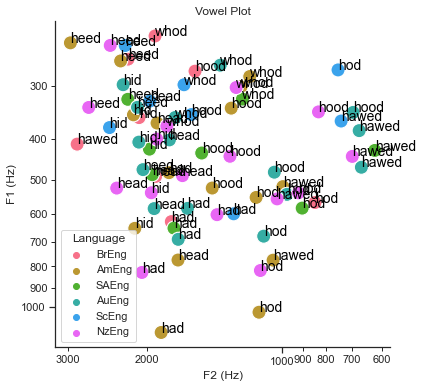

<AxesSubplot:title={'center':'Vowel Plot'}, xlabel='F2 (Hz)', ylabel='F1 (Hz)'>

In [11]:
vowelplot(df, color = 'Language')

In [12]:
# convert to bark scale
barkify(df, ["F1","F2"])

,Language,Vowel,F1,F2,F3,Speaker,z1,z2
0,BrEng,heed,258.615520,2202.613599,3362.927236,1,2.595139,13.656296
1,BrEng,hid,355.617499,2082.039600,2949.967830,1,3.587306,13.279732
2,BrEng,head,489.886958,1912.026845,2698.226652,1,4.831010,12.708916
3,BrEng,had,626.668089,1764.347484,2438.087258,1,5.965217,12.170790
4,BrEng,hod,564.694510,843.948944,2522.263304,1,5.466551,7.539431
...,...,...,...,...,...,...,...,...
67,NzEng,had,826.615611,2051.562662,2885.504996,9,7.422860,13.180965
68,NzEng,hod,817.768812,1117.184565,2759.936531,9,7.362803,9.203481
69,NzEng,hawed,553.666105,1025.509931,2885.608446,9,5.375235,8.679121
70,NzEng,hood,438.987051,1305.921266,2618.297000,9,4.375922,10.190329


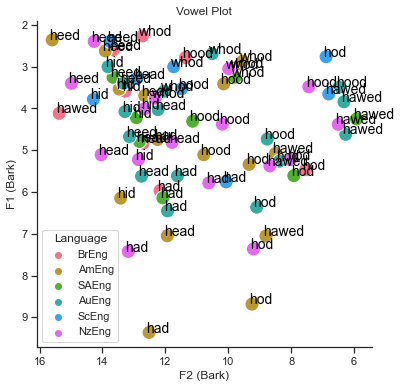

<AxesSubplot:title={'center':'Vowel Plot'}, xlabel='F2 (Bark)', ylabel='F1 (Bark)'>

In [13]:
vowelplot(df,
          F1 = "z1",
          F2 = "z2",
          color = "Language",
          unit = "Bark",
          logscale = False)

In [14]:
# normalize using Lovanov method
Lobify(df, 
       group = "Speaker",
       formants = ["F1","F2"]
      )

,Language,Vowel,F1,F2,F3,Speaker,z1,z2,zsc_F1,zsc_F2
0,BrEng,heed,258.615520,2202.613599,3362.927236,1,2.595139,13.656296,-0.963377,0.540771
1,BrEng,hid,355.617499,2082.039600,2949.967830,1,3.587306,13.279732,-0.308487,0.330131
2,BrEng,head,489.886958,1912.026845,2698.226652,1,4.831010,12.708916,0.598008,0.033123
3,BrEng,had,626.668089,1764.347484,2438.087258,1,5.965217,12.170790,1.521460,-0.224869
4,BrEng,hod,564.694510,843.948944,2522.263304,1,5.466551,7.539431,1.103057,-1.832781
...,...,...,...,...,...,...,...,...,...,...
67,NzEng,had,826.615611,2051.562662,2885.504996,9,7.422860,13.180965,1.495830,0.445693
68,NzEng,hod,817.768812,1117.184565,2759.936531,9,7.362803,9.203481,1.447911,-1.123430
69,NzEng,hawed,553.666105,1025.509931,2885.608446,9,5.375235,8.679121,0.017384,-1.277381
70,NzEng,hood,438.987051,1305.921266,2618.297000,9,4.375922,10.190329,-0.603782,-0.806480


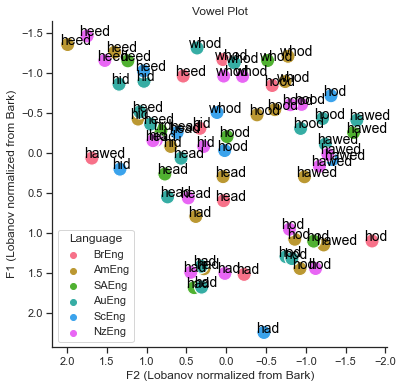

<AxesSubplot:title={'center':'Vowel Plot'}, xlabel='F2 (Lobanov normalized from Bark)', ylabel='F1 (Lobanov normalized from Bark)'>

In [15]:
vowelplot(df,
          F1 = "zsc_F1",
          F2 = "zsc_F2",
          color = "Language",
          unit = "Lobanov normalized from Bark",
          logscale = False)

In [16]:
df_means = df.groupby(['Language', 'Vowel'])['zsc_F1', 'zsc_F2'].mean()
df_means = df_means.reset_index()
df_means

<ipython-input-16-14912219495e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_means = df.groupby(['Language', 'Vowel'])['zsc_F1', 'zsc_F2'].mean()


,Language,Vowel,zsc_F1,zsc_F2
0,AmEng,had,1.123653,0.330695
1,AmEng,hawed,0.725706,-1.104418
2,AmEng,head,0.011813,0.325293
3,AmEng,heed,-1.310400,1.698290
4,AmEng,hid,-0.252938,0.902464
5,AmEng,hod,1.264548,-0.894557
6,AmEng,hood,-0.509719,-0.499040
7,AmEng,whod,-1.052663,-0.758728
8,AuEng,had,1.550390,0.311969
9,AuEng,hawed,-0.260673,-1.443399


In [17]:
df_means = df.groupby(['Language', 'Vowel'])['zsc_F1', 'zsc_F2'].mean()
df_means = df_means.reset_index()
df_means

<ipython-input-17-14912219495e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_means = df.groupby(['Language', 'Vowel'])['zsc_F1', 'zsc_F2'].mean()


,Language,Vowel,zsc_F1,zsc_F2
0,AmEng,had,1.123653,0.330695
1,AmEng,hawed,0.725706,-1.104418
2,AmEng,head,0.011813,0.325293
3,AmEng,heed,-1.310400,1.698290
4,AmEng,hid,-0.252938,0.902464
5,AmEng,hod,1.264548,-0.894557
6,AmEng,hood,-0.509719,-0.499040
7,AmEng,whod,-1.052663,-0.758728
8,AuEng,had,1.550390,0.311969
9,AuEng,hawed,-0.260673,-1.443399


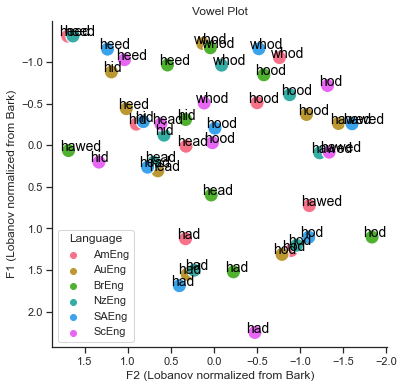

<AxesSubplot:title={'center':'Vowel Plot'}, xlabel='F2 (Lobanov normalized from Bark)', ylabel='F1 (Lobanov normalized from Bark)'>

In [18]:
vowelplot(df_means,
          F1 = "zsc_F1",
          F2 = "zsc_F2",
          color = "Language",
          unit = "Lobanov normalized from Bark",
          logscale = False)